In [1]:
! pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.2 MB/s eta 0:00:00


In [2]:
! pip install qiskit_ibm_runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 10.5 MB/s eta 0:00:00


In [3]:
! pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 80.9 MB/s eta 0:00:00


In [4]:
! pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=7f2db42cac54d8a4a4fa24599fe7115d95020caea54bc1482af81bf11b48569d
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


# **QFT**

Now as we imported all the necessary libraries, let us define the function or circuit upon which QFT acts.

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy import pi
from qiskit_aer import Aer

 Let us define the function or circuit upon which QFT acts.

In [ ]:
def qft_rotations(circuit, n):
  if n == 0: # Exit function if circuit is empty
    return circuit
  n -= 1 # Indexes start from 0
  circuit.h(n) # Apply the H-gate to the most significant qubit
  for qubit in range(n):
  # For each less significant qubit, we need to do a
  # smaller-angled controlled rotation:
    circuit.cp(pi/2**(n-qubit), qubit, n)
  qft_rotations(circuit, n)

As we defined the fucntion ''qft_rotations'' above which takes quantum circuit and number of qubits as input, let us
build the quantum circuit using the above defined function. Here we take three qubits as an example. Please
feel free to change it as required.

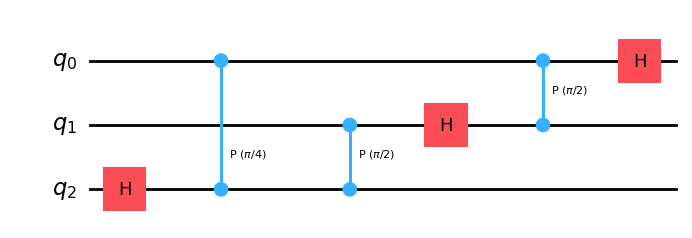

In [ ]:
qc = QuantumCircuit(3)
qft_rotations(qc,3)
qc.draw('mpl')

Now, we write another function to swap the registers after QFT computation.

In [ ]:
def swap_registers(circuit, n):
  for qubit in range(n//2):
    circuit.swap(qubit, n-qubit-1)
  return circuit

As we defined both the necessary functions above, let us club them to form a Quantum Fourier Transform. We write
a separate function for this:

In [ ]:
def qft(circuit, n):
  """QFT on the first n qubits in circuit"""
  qft_rotations(circuit, n)
  swap_registers(circuit, n)
  return circuit

Let us apply our QFT to a simple state, i.e., |000〉. The output state should be |+ + +〉. Let us examine whether the
QFT written above is working:
We build a quantum circuit of three qubits and states initialized to 0’s.

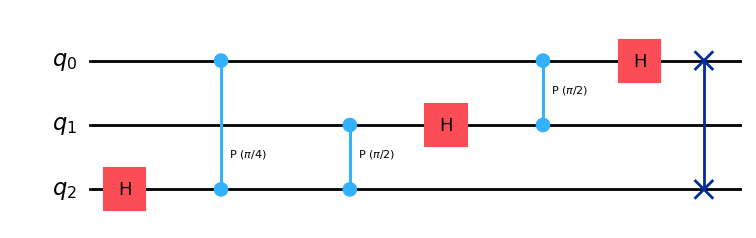

In [ ]:
# QFT circuit for a 3 Qubit case at state |000>
qc = QuantumCircuit(3)
qft(qc,3)
qc.draw('mpl')

Now, we run the above circuit on statevector_simulator . We shall also see the Bloch sphere of the three qubits so
that we can verify the output.


Quantum state is: Statevector([0.354+0.j, 0.354+0.j, 0.354+0.j, 0.354+0.j, 0.354+0.j,
             0.354+0.j, 0.354+0.j, 0.354+0.j],
            dims=(2, 2, 2))


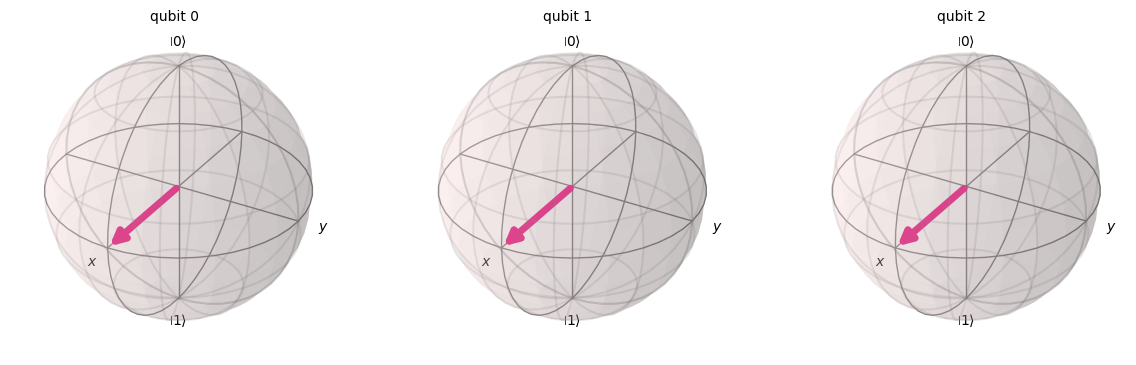

In [ ]:
backend = Aer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend))
result = job.result()
statevector = result.get_statevector(qc, decimals=3)
print("\nQuantum state is:",statevector)
plot_bloch_multivector(statevector)

Let us also code Inverse Quantum Fourier Transform. Inverse Quantum Fourier Transform, as the name
suggests, is the inverse of Quantum Fourier Transform. To explain explicitly, let us take the output of the above Quantum
Fourier Transform, which is |+ + +〉 and apply the inverse Fourier transform. The output which should be obvious is |000〉. Let us write the code and verify.

In [ ]:
def inverse_qft(circuit, n):
  """Does the inverse QFT on the first n qubits in circuit"""
  # First we create a QFT circuit of the correct size:
  qft_circ = qft(QuantumCircuit(n), n)
  # Then we take the inverse of this circuit
  invqft_circ = qft_circ.inverse()
  # And add it to the first n qubits in our existing circuit
  circuit.append(invqft_circ, circuit.qubits[:n])
  return circuit.decompose() # .decompose() allows us to see the individual gates

Now let us create the state |+ + +〉, which is the output of quantum Fourier transform:

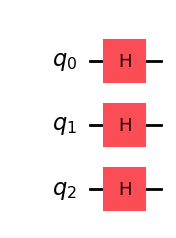

In [ ]:
nqubits = 3
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
  qc.h(qubit)
qc.draw('mpl')

Now, let us apply inverse quantum fourier transform function that we built above ‘inverse_qft’ to the circuit we just
designed.

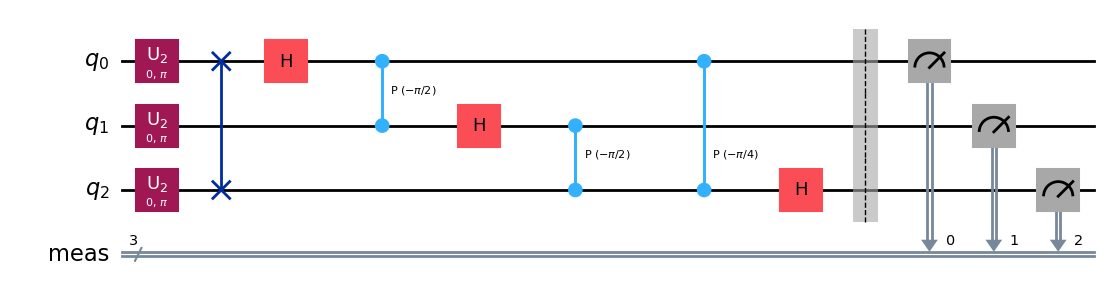

In [ ]:
# Calling the inverse QFT Function
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw('mpl')

Let us now run this circuit on qasm simulator and validate the result ourselves. The output should be |000〉

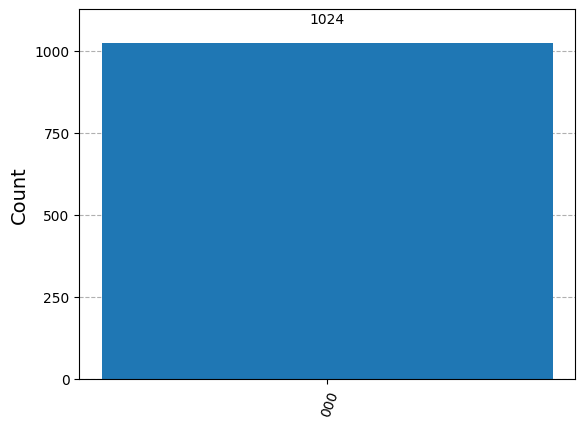

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(transpile(qc, backend))
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

So, the state received after applying IQFT to |+ + +〉 is |000>

# **Quantum Phase Estimation**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
# importing Qiskit
from qiskit import transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import Aer
# import basic plot tools
from qiskit.visualization import plot_histogram


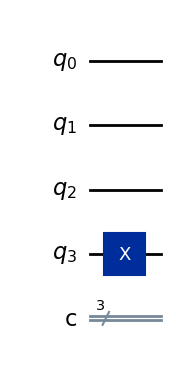

In [2]:
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw('mpl')

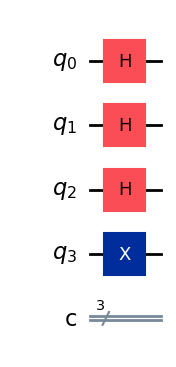

In [3]:
for qubit in range(3):
  qpe.h(qubit)
qpe.draw('mpl')

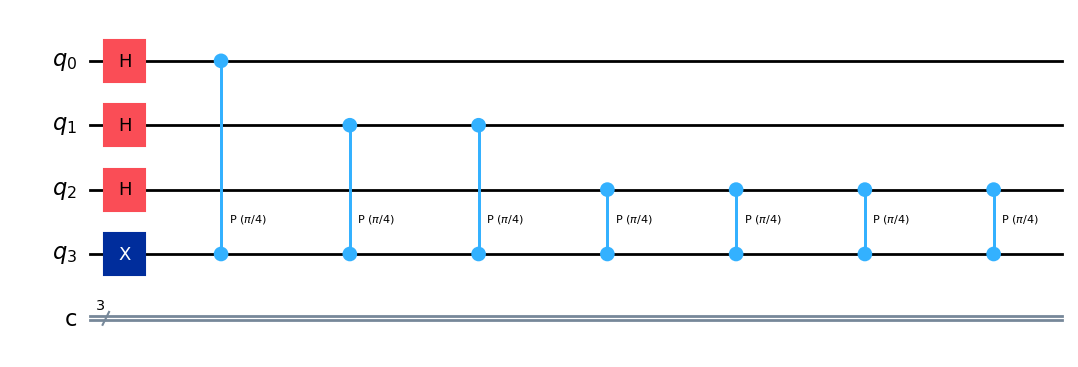

In [4]:
repetitions = 1
for counting_qubit in range(3):
  for i in range(repetitions):
    qpe.cp(math.pi/4, counting_qubit, 3); # This is CU
  repetitions *= 2
qpe.draw('mpl')

In [5]:
def qft_dagger(qc, n):
  """n-qubit QFTdagger the first n qubits in circ"""
  # Don't forget the Swaps!
  for qubit in range(n//2):
    qc.swap(qubit, n-qubit-1)
  for j in range(n):
    for m in range(j):
      qc.cp(-math.pi/float(2**(j-m)), m, j)
    qc.h(j)

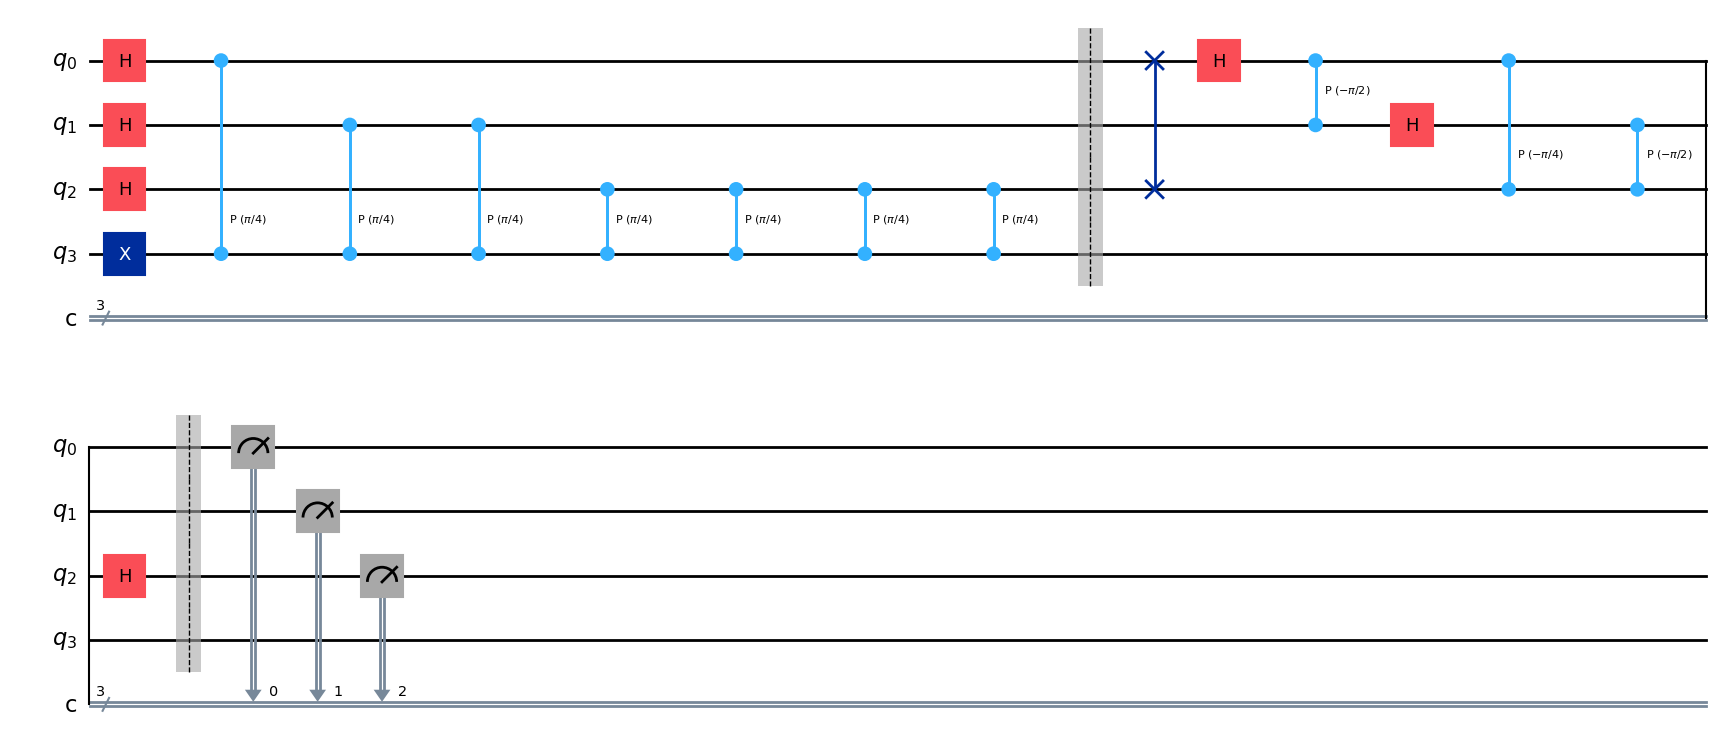

In [6]:
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 3)
# Measure
qpe.barrier()
for n in range(3):
  qpe.measure(n,n)
qpe.draw('mpl')

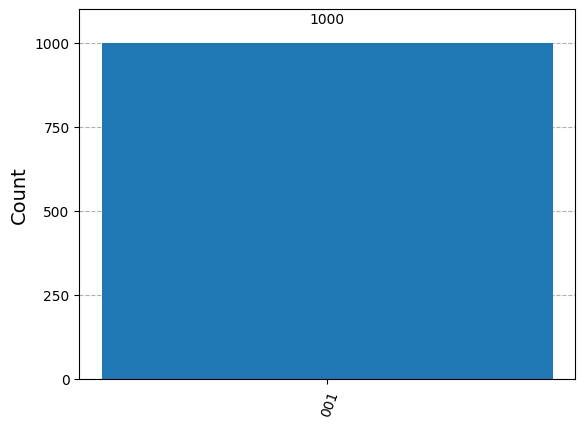

In [7]:
simulator = Aer.get_backend('qasm_simulator')
tqc = transpile(qpe, simulator)
counts = simulator.run(tqc, shots=1000).result().get_counts()
plot_histogram(counts)

We see we get one result (001) with certainty, which translates to the decimal: 1. We now need to divide our result
(1) by 2^n to get θ: 1/(2^3) = 1/8. Instead of T let us assume a gate with θ = 1/3. Let us first design the circuit:

In [8]:
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)
# Apply H-Gates to counting qubits:
for qubit in range(3):
  qpe2.h(qubit)
  # Prepare our eigenstate |psi>:
  qpe2.x(3)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
  for i in range(repetitions):
    qpe2.cp(angle, counting_qubit, 3);
  repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe2, 3)

# Measure of course!
for n in range(3):
  qpe2.measure(n,n)

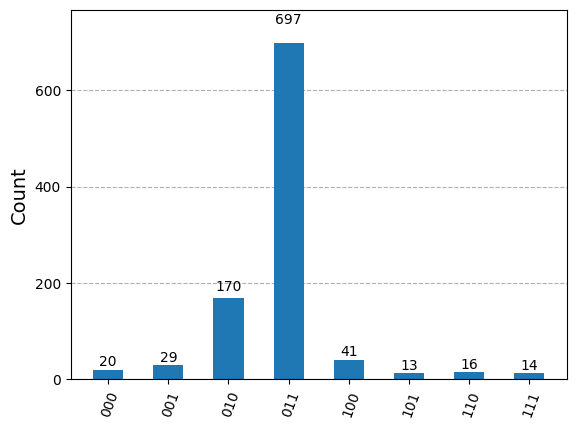

In [9]:
simulator = Aer.get_backend('qasm_simulator')
tqc = transpile(qpe2, simulator)
counts = simulator.run(tqc, shots=1000).result().get_counts()
plot_histogram(counts)

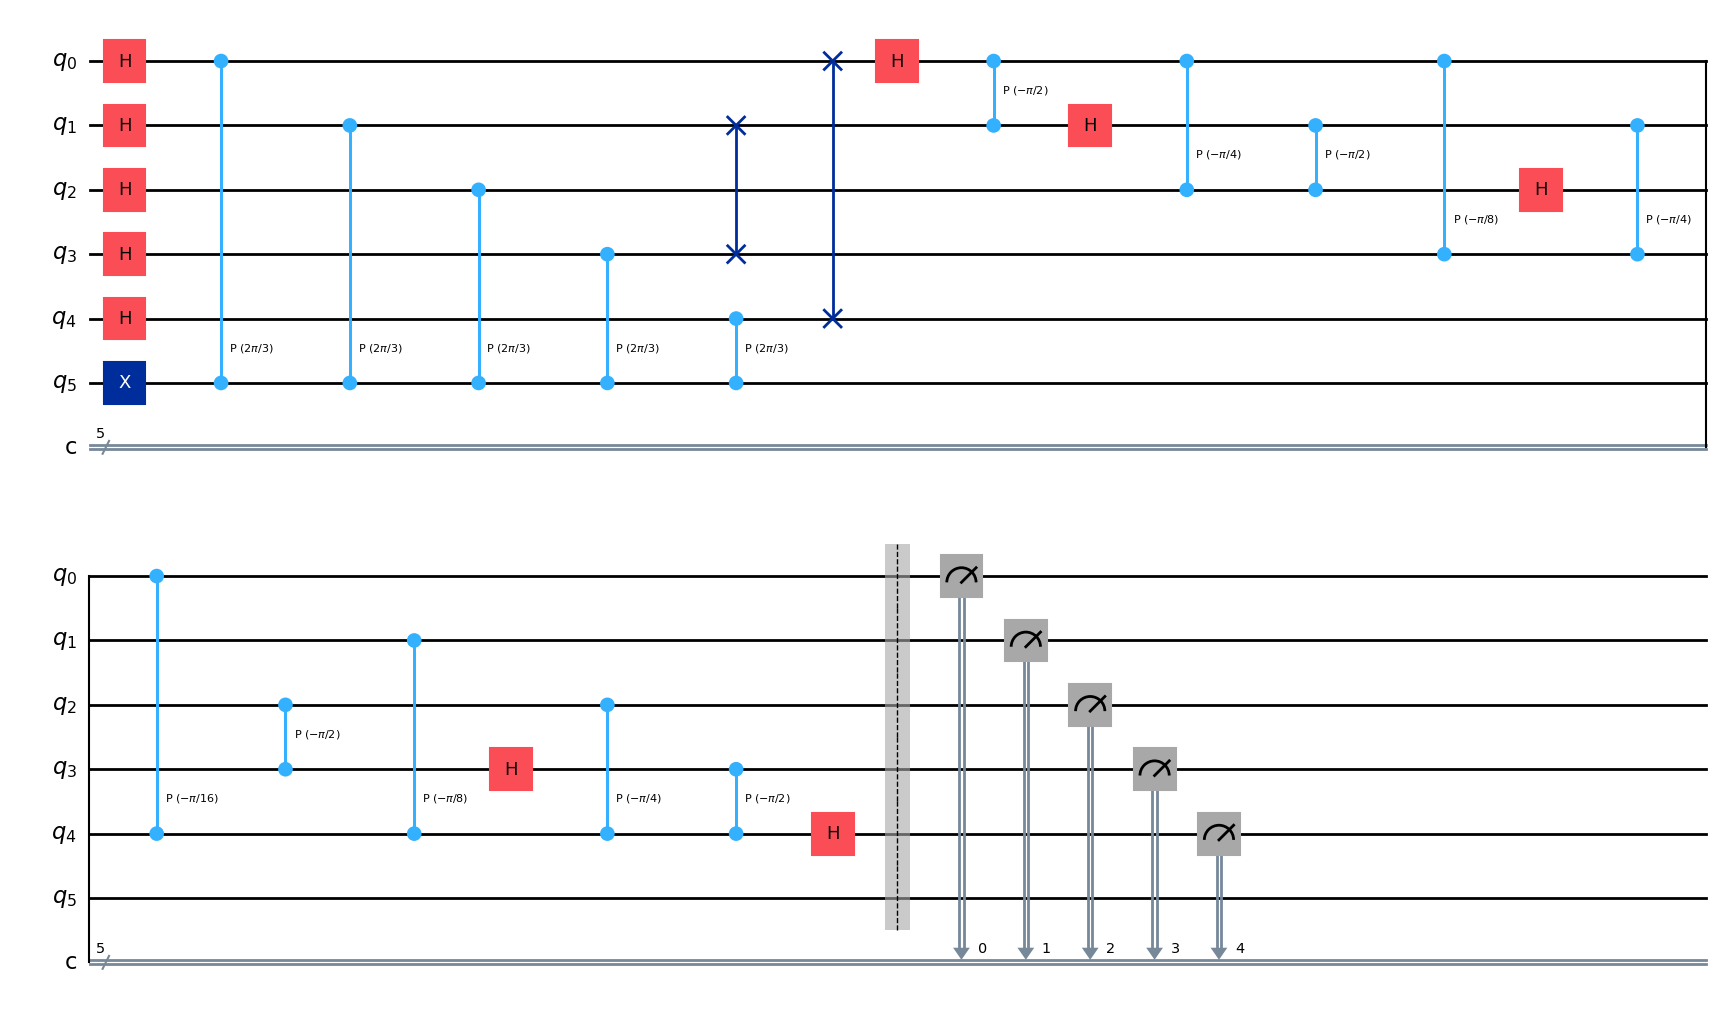

In [10]:
# Create and set up circuit
qpe3 = QuantumCircuit(6, 5)
# Apply H-Gates to counting qubits:
for qubit in range(5):
  qpe3.h(qubit)
# Prepare our eigenstate |psi>:
qpe3.x(5)
# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
  for i in range(repetitions):
    qpe3.cp(angle, counting_qubit, 5);
repetitions *= 2
# Do the inverse QFT:
qft_dagger(qpe3, 5)
# Measure of course!
qpe3.barrier()
for n in range(5):
  qpe3.measure(n,n)
qpe3.draw('mpl')

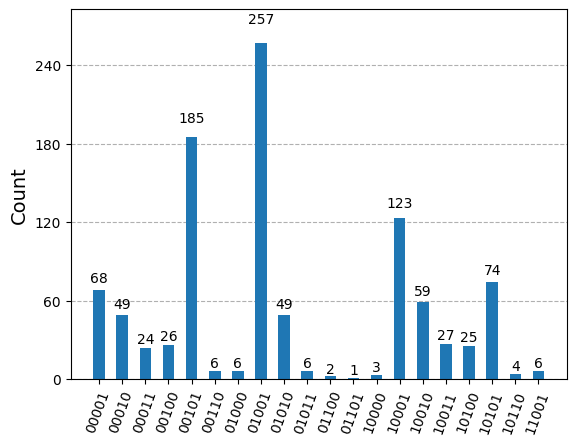

In [11]:
simulator = Aer.get_backend('qasm_simulator')
tqc = transpile(qpe3, simulator)
counts = simulator.run(tqc, shots=1000).result().get_counts()
plot_histogram(counts)

# **Shors Algorithm**

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from math import gcd
import pandas as pd
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

In [13]:
def initialize_qubits(given_circuit, n, m):
  given_circuit.h(range(n))
  given_circuit.x(n+m-1)

In [14]:
def c_amod15(a, x):
  if a not in [2,7,8,11,13]:
    raise ValueError("'a' must be 2,7,8,11,13")
  U = QuantumCircuit(4)
  for iteration in range(x):
    if a in [2,13]:
      U.swap(0,1)
      U.swap(1,2)
      U.swap(2,3)
    if a in [7,8]:
      U.swap(2,3)
      U.swap(1,2)
      U.swap(0,1)
    if a == 11:
      U.swap(1,3)
      U.swap(0,2)
    if a in [7,11,13]:
      for q in range(4):
        U.x(q)

  U = U.to_gate()
  U.name = "%i^%i mod 15" % (a, x)
  c_U = U.control()
  return c_U

In [15]:
def modular_exponentiation(circuit, n, m, a):
  for x in range(n):
    exponent = 2**x
    circuit.append(c_amod15(a, exponent),
    [x] + list(range(n, n+m)))

In [16]:
def inverse_qft(circuit,measurement_qubits):
  circuit.append(QFT( len(measurement_qubits), do_swaps=False).inverse(),
  measurement_qubits)

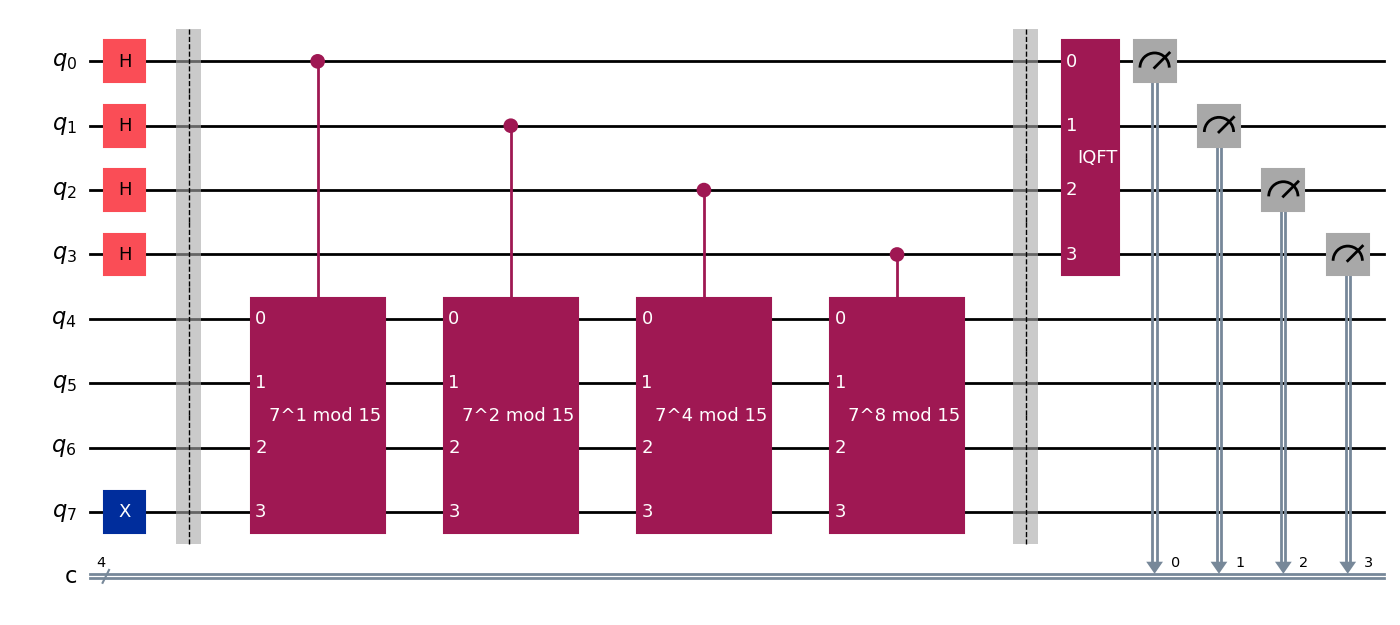

In [17]:
def shors_algorithm(n, m, a):
  qc = QuantumCircuit(n+m, n)
  initialize_qubits(qc, n, m)
  qc.barrier()
  modular_exponentiation(qc, n, m, a)
  qc.barrier()
  inverse_qft(qc, range(n))
  qc.measure(range(n), range(n))
  return qc

n = 4; m = 4; a = 7
final_circuit = shors_algorithm(n, m, a)
final_circuit.draw('mpl')

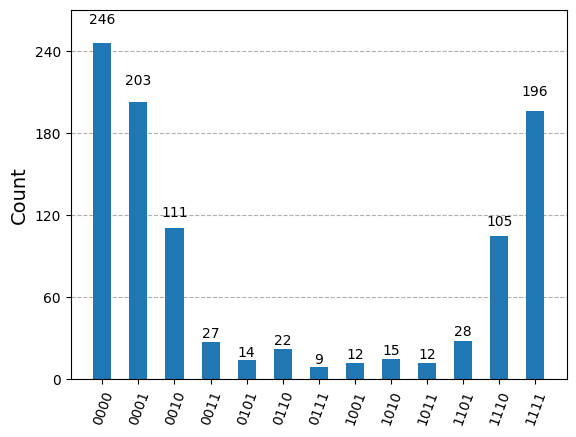

In [18]:
simulator = Aer.get_backend('qasm_simulator')
tqc = transpile(final_circuit, simulator)
counts = simulator.run(tqc, shots=1000).result().get_counts()
plot_histogram(counts)

In [19]:
for i in counts:
  measured_value = int(i[::-1], 2)
  if measured_value % 2 != 0:
    print("Measured value not even")
    continue
  x = int((a ** (measured_value/2)) % 15)
  if (x + 1) % 15 == 0:
    continue
  factors = gcd(x + 1, 15), gcd(x - 1, 15)
  print(factors)

Measured value not even
Measured value not even
(1, 3)
(5, 3)
Measured value not even
(1, 3)
Measured value not even
(1, 3)
Measured value not even
(1, 15)
Measured value not even
(5, 3)
(1, 15)


# **Grover’s Search Algorithm**

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
from qiskit.providers.basic_provider import BasicSimulator

In [21]:
# Function to Initialize Quantum States for N Qubits
# Two parameters: GC: a quantum circuit, and qubits: the number of qubits
def Initialize(GC, qubits):
# Apply a Hadamard (H) Gate to the Qubits
# Hadamard gate just puts the qubit in a superposition
  for q in qubits: # iterates through all the qubits,
    GC.h(q) # applying a H gate to each individually
  return GC # returns the new quantum circuit with the H gates applied

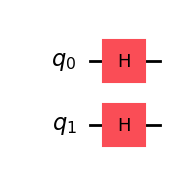

In [22]:
# Grover's Algorithm with 2 qubits
# |x> = |11>
n = 2 # number of qubits
grover_circuit = QuantumCircuit(n) # create a Quantum Circuit with the name 'grover_circuit'
grover_circuit = Initialize(grover_circuit, [0, 1]) # initialize said circuit
grover_circuit.draw('mpl') # draw the circuit

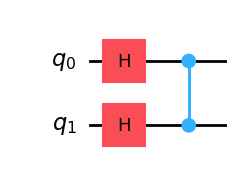

In [23]:
#Apply the oracle specific to 2 qubits
grover_circuit.cz(0, 1) #Oracle is a CZ gate
grover_circuit.draw('mpl') #draw the circuit

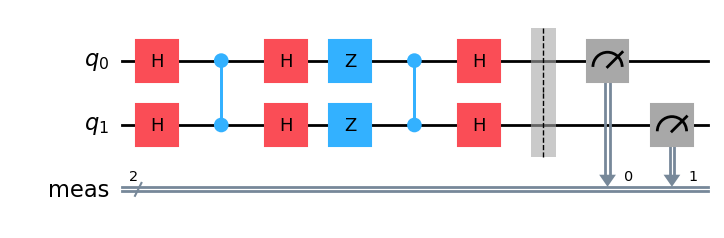

In [24]:
# Apply the Diffuser
# [0,1] means apply the gate to qubits q0 and q1
grover_circuit.h([0,1]) # applies H gate
grover_circuit.z([0,1]) # applies Z gate
grover_circuit.cz(0,1) # applies CZ gate
grover_circuit.h([0,1]) # applies H gate
grover_circuit.measure_all() # measure all the qubits
grover_circuit.draw('mpl')

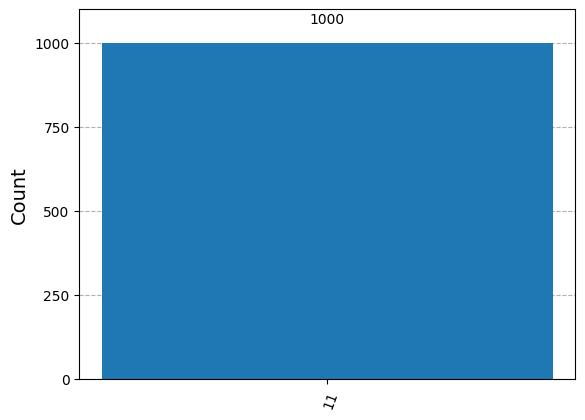

In [25]:
backend = BasicSimulator()
tqc = transpile(grover_circuit, backend)
counts = backend.run(tqc, shots=1000).result().get_counts()
plot_histogram(counts)